# World Happiness Index

## preparing dataset

In [71]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
df2015 = pd.read_csv('2015.csv')
df2016 = pd.read_csv('2016.csv')
df2017 = pd.read_csv('2017.csv')
df2018 = pd.read_csv('2018.csv')
df2019 = pd.read_csv('2019.csv')

df2015.drop(['Standard Error', 'Dystopia Residual'],axis=1,inplace=True)
df2015.rename(columns = {'Economy (GDP per Capita)':'GDP_per_capita', 'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Family':'Social_Support', 'Health (Life Expectancy)':'Life_Expectancy', 'Trust (Government Corruption)':'Corruption'}, inplace = True)
#get all regions and proper column order for later on
country_region = df2015[['Country', 'Region']].copy()
cols = df2015.columns.tolist()

df2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'],axis=1,inplace=True)
df2016.rename(columns = {'Economy (GDP per Capita)':'GDP_per_capita', 'Happiness Rank':'Happiness_Rank', 'Happiness Score':'Happiness_Score', 'Family':'Social_Support', 'Health (Life Expectancy)':'Life_Expectancy', 'Trust (Government Corruption)':'Corruption' }, inplace = True)

df2017.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'],axis=1,inplace=True)
df2017.rename(columns = {'Happiness.Rank':'Happiness_Rank', 'Happiness.Score':'Happiness_Score', 'Economy..GDP.per.Capita.':'GDP_per_capita', 'Family': 'Social_Support', 'Health..Life.Expectancy.': 'Life_Expectancy', 'Trust..Government.Corruption.': 'Corruption'},inplace=True)
df2017 = df2017.merge(country_region, on='Country') #add the missing region for year 2019
df2017 = df2017[cols] #sort columns

df2018.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'GDP per capita':'GDP_per_capita', 'Healthy life expectancy':'Life_Expectancy', 'Perceptions of corruption':'Corruption', 'Social support':'Social_Support', 'Freedom to make life choices':'Freedom', 'Score':'Happiness_Score'},inplace=True)
df2018 = df2018.merge(country_region, on='Country') #add the missing region for year 2019
df2018 = df2018[cols] #sort columns

df2019.rename(columns = {'Overall rank':'Happiness_Rank', 'Country or region':'Country', 'GDP per capita':'GDP_per_capita', 'Healthy life expectancy':'Life_Expectancy', 'Perceptions of corruption':'Corruption',  'Social support':'Social_Support', 'Freedom to make life choices':'Freedom', 'Score':'Happiness_Score'},inplace=True)
df2019 = df2019.merge(country_region, on='Country') #add the missing region for year 2019
df2019 = df2019[cols] #sort columns

now all into one df

In [73]:
df2015["year"] = str(2015)
df2016["year"] = str(2016)
df2017["year"] = str(2017)
df2018["year"] = str(2018)
df2019["year"] = str(2019)
df_all = df2015.append([df2016,df2017,df2018,df2019])

# First lets look at correlation between happiness & the specific attributes

Considered in dataset contributing to happiness, values are in relation to Dystopia, the most unhappiest place on earth
- GDP per Capita
- Family
- Life Expectancy
- Freedom
- Generosity
- Trust Government Corruption


### Correlation: influence of seperate factors regarding Happiness Rank
We are using a heatmap to show the correlation.

### Year 2015

In [74]:
corr2015 = df2015.corr()
corr2015

,Happiness_Rank,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity
Happiness_Rank,1.000000,-0.992105,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142
Happiness_Score,-0.992105,1.000000,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319
GDP_per_capita,-0.785267,0.780966,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465
Social_Support,-0.733644,0.740605,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513
Life_Expectancy,-0.735613,0.724200,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335
Freedom,-0.556886,0.568211,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916
Corruption,-0.372315,0.395199,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123
Generosity,-0.160142,0.180319,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000


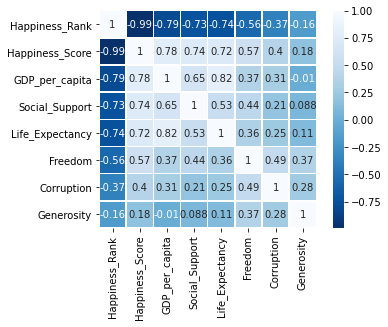

In [75]:
sns.heatmap(corr2015, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');

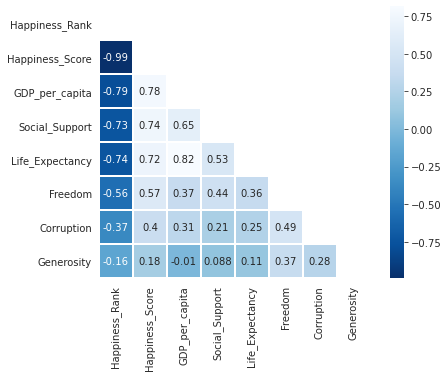

In [76]:
mask = np.zeros_like(corr2015)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))

    ax = sns.heatmap(corr2015, mask = mask, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

Conclusion: We can see that Happiness is highly dependent on GDP as well as Social Support through family and Healthy life expectancy

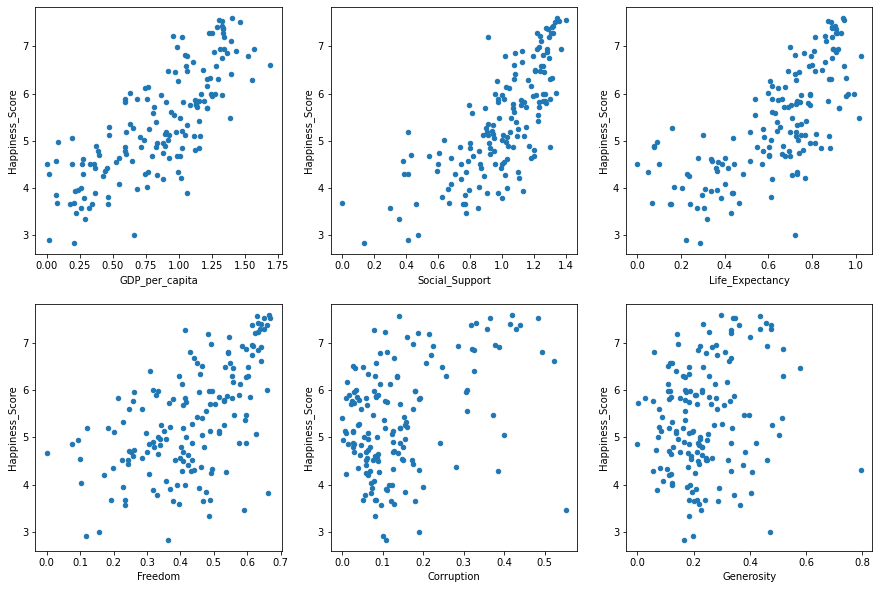

In [77]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10));

df2015.plot.scatter(ax=axes[0,0], x = 'GDP_per_capita', y = 'Happiness_Score');
df2015.plot.scatter(ax=axes[0,1], x = 'Social_Support', y = 'Happiness_Score');
df2015.plot.scatter(ax=axes[0,2], x = 'Life_Expectancy', y = 'Happiness_Score');
df2015.plot.scatter(ax=axes[1,0], x = 'Freedom', y = 'Happiness_Score');
df2015.plot.scatter(ax=axes[1,1], x = 'Corruption', y = 'Happiness_Score');
df2015.plot.scatter(ax=axes[1,2], x = 'Generosity', y = 'Happiness_Score');


This also shows, how gdp and social support attribute the most to the happiness factor while generosity and preception of corruption show least correlation to felt happiness.
Let's use Scatterplot series to look at correlation in the year 2015

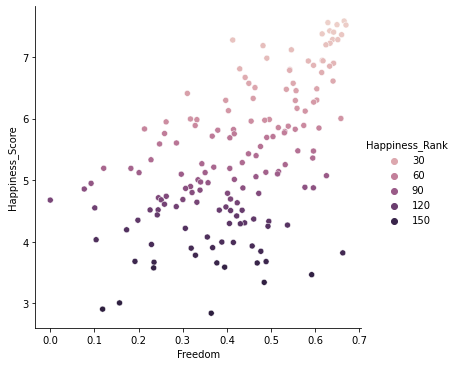

In [78]:
sns.relplot(x="Freedom", y="Happiness_Score", hue="Happiness_Rank", data=df2015);

### Change in correlation from 2015-2019 <br>
Does correlation change over the years and are other factors more important than others in 2019? <br>
Correlation in general:

In [79]:
corr2019 = df2019.corr()
corr2015 = df2015.corr()

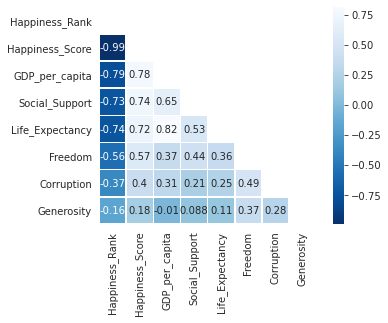

In [80]:
mask = np.zeros_like(corr2015)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots()

    ax = sns.heatmap(corr2015, mask = mask, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

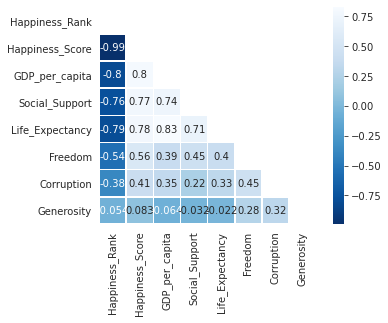

In [81]:
mask = np.zeros_like(corr2019)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots()

    ax = sns.heatmap(corr2019, mask = mask, annot=True, linewidths=.5, square = True, cmap = 'Blues_r')

And in more detail specific development of attributes over time from year 2015 to 2019

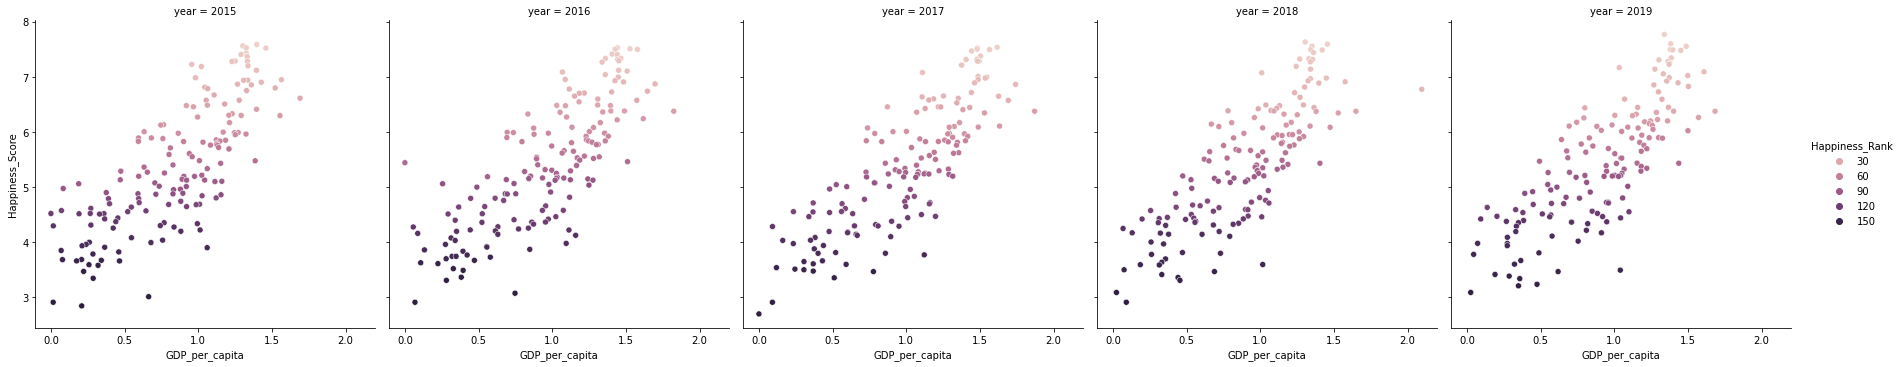

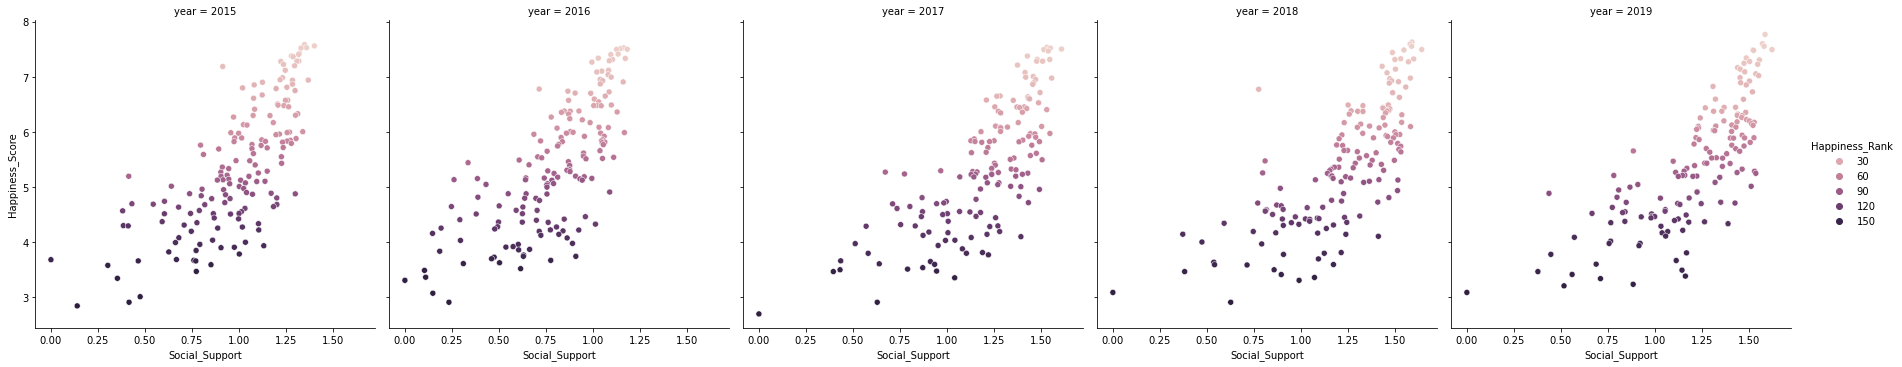

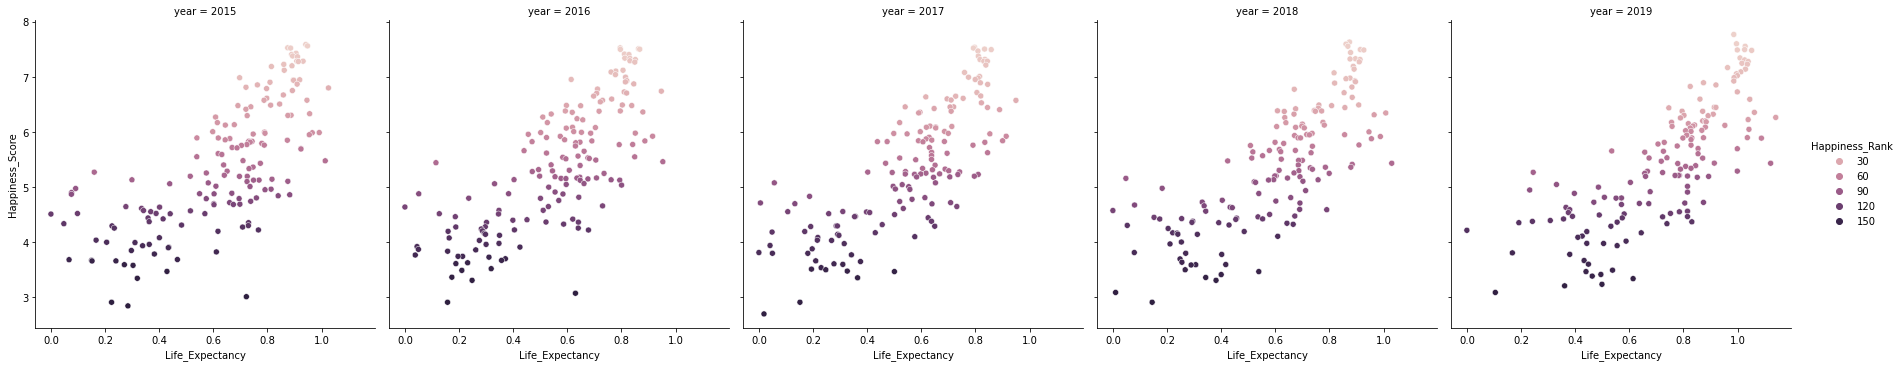

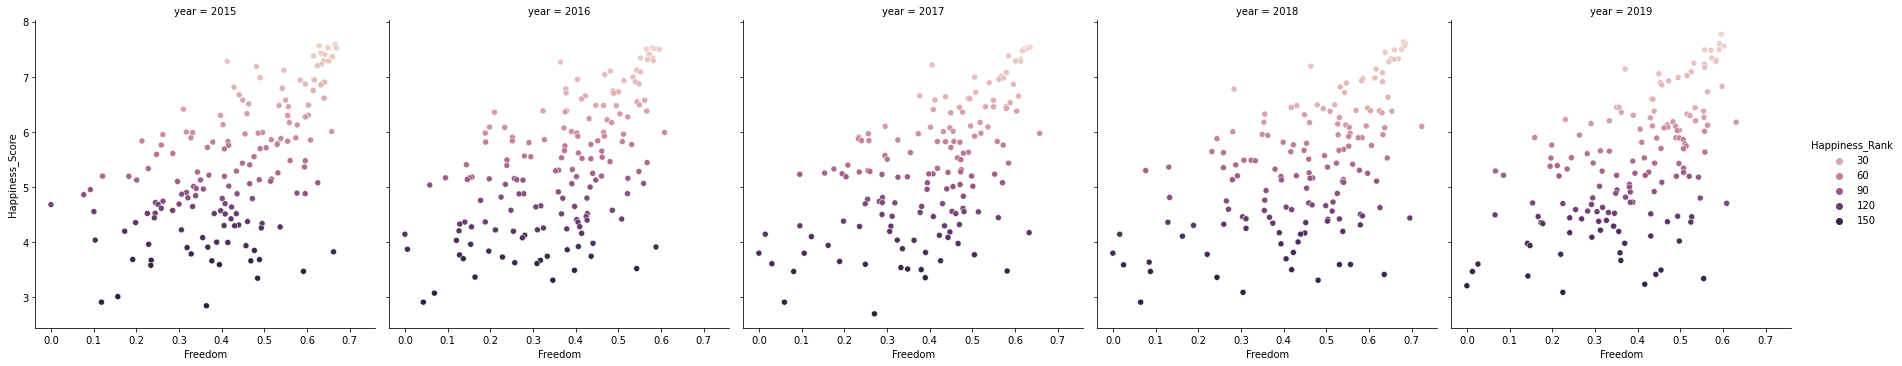

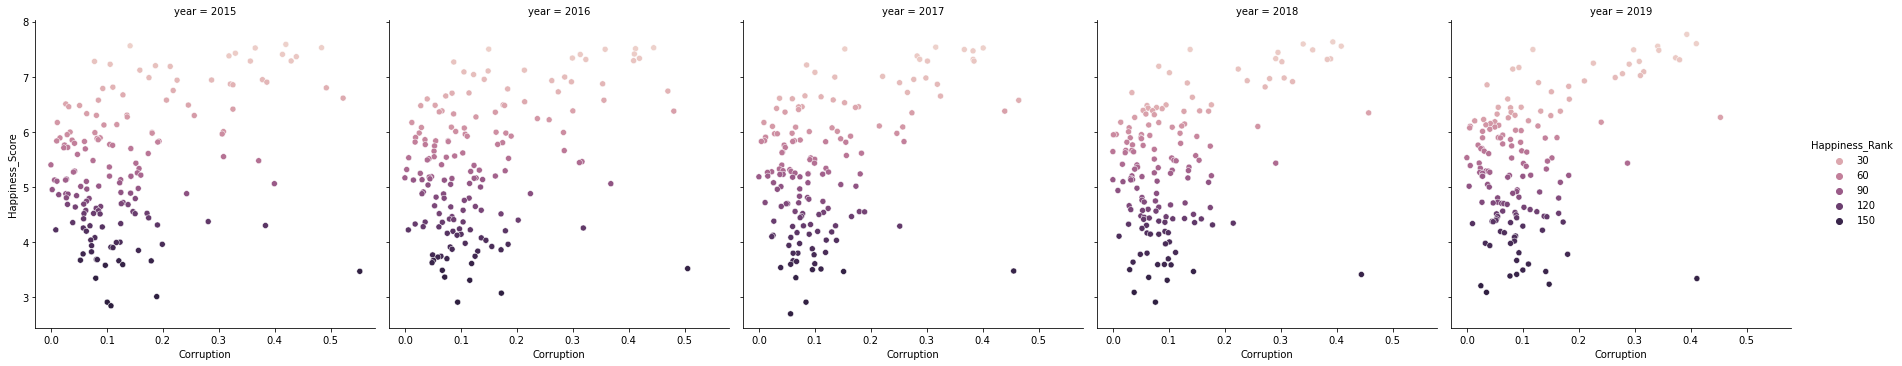

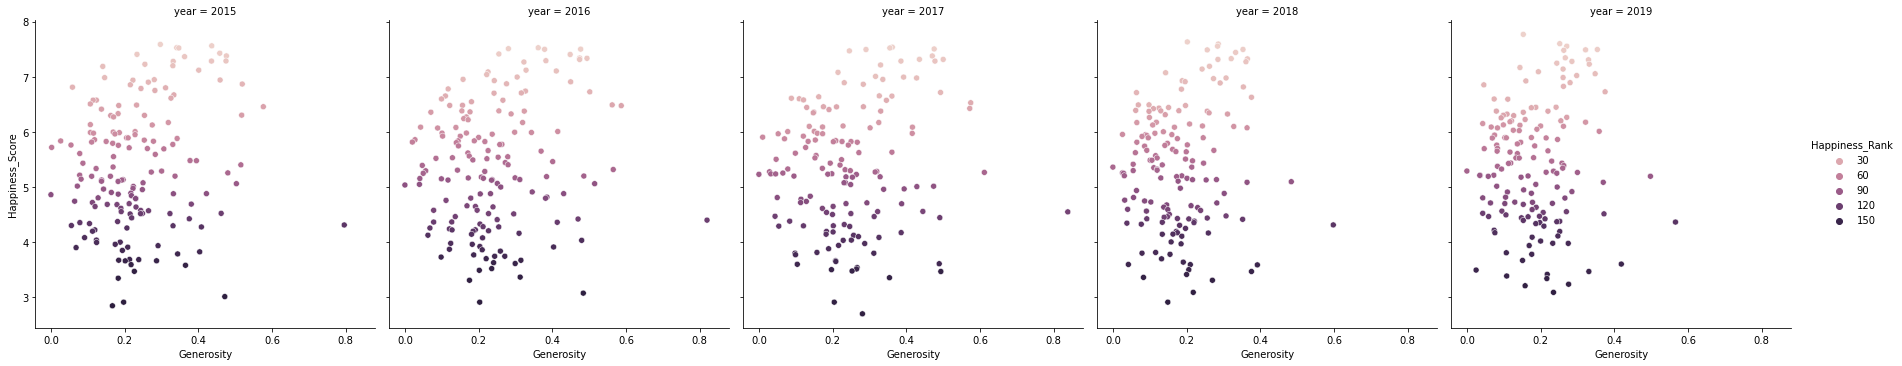

In [82]:
sns.relplot(data=df_all, x="GDP_per_capita", y="Happiness_Score", hue="Happiness_Rank", col="year");
sns.relplot(data=df_all, x="Social_Support", y="Happiness_Score", hue="Happiness_Rank", col="year");
sns.relplot(data=df_all, x="Life_Expectancy", y="Happiness_Score", hue="Happiness_Rank", col="year");
sns.relplot(data=df_all, x="Freedom", y="Happiness_Score", hue="Happiness_Rank", col="year");
sns.relplot(data=df_all, x="Corruption", y="Happiness_Score", hue="Happiness_Rank", col="year");
sns.relplot(data=df_all, x="Generosity", y="Happiness_Score", hue="Happiness_Rank", col="year");

Conclusion: Therefore we can see that correlation in 2015 and 2019 is still depending on the same attributes, mainly GDP, social support aswell as life expectancy and less on corruption or generosity.

## Mean values of top10 countries, bottom10 countries and regions in year 2015

In [83]:
df2015_mean_happiness = df2015.copy()
location_mean_byregion = df2015.groupby(['Region']).mean()
mean_happiness_scores = location_mean_byregion['Happiness_Score'].to_dict()
df2015_mean_happiness['Mean_Happiness_Score'] = df2015_mean_happiness['Region'].map(mean_happiness_scores)

Let's look at distribution of Happiness per region. Are there countries with only good ranks or bad ranks? Are there regions with broad spectrums from very happy to very unhappy?

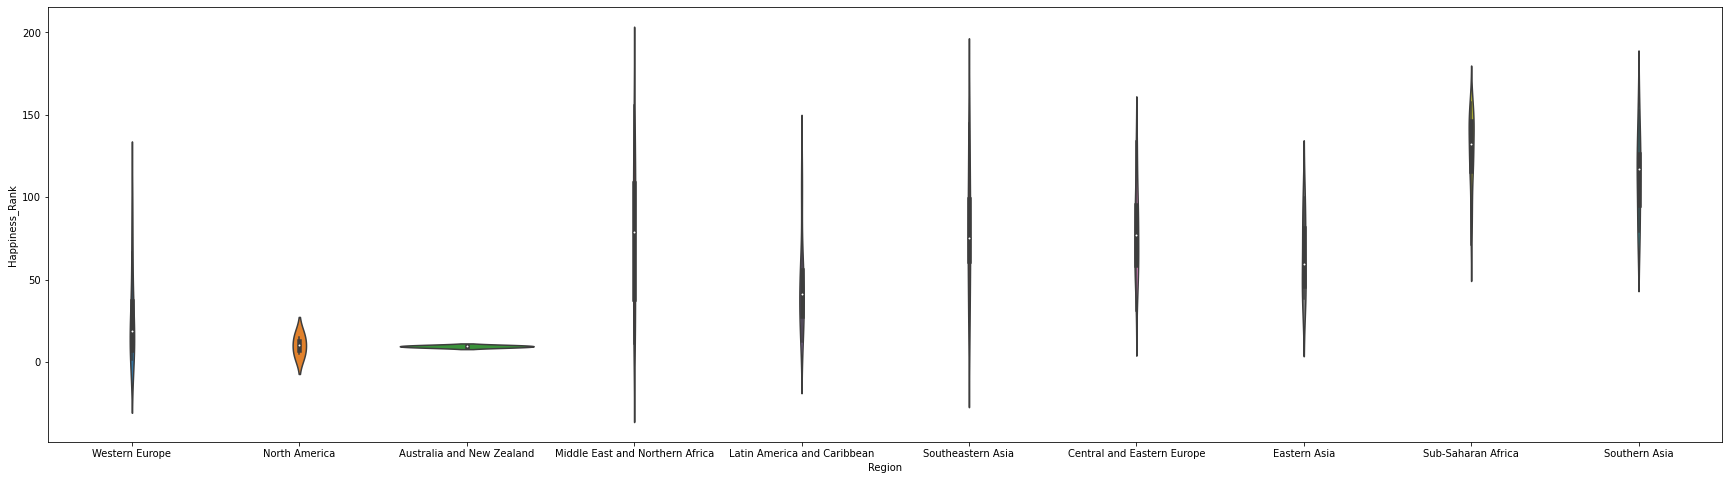

In [84]:
fig = plt.gcf()
fig.set_size_inches(30, 8)

sns.violinplot(x="Region", y="Happiness_Rank", data=df2015)

plt.show()

Conclustion: Australia and New Zealand obviously is only 2 countries, but we can see that Western Europe is mainly happy, in the middle east the band is pretty wide and in Sub Saharan Africa aswell as Southern Asia Happiness is mainly in the bottom part of the rank.

todo: consideration to explore, would be if there are countries diverging from the mean in their respective area?

### Top 10 Countries from 2015 next to each other regarding different attributes using stacked bar charts <br>
Therefore we focus now mainly on year 2015. And evaluate the seperate attributes. Are there differences in the top 10 most happiest countries in the world? Does one country derive its happiness more from generosity compared to others?

In [85]:
df2015_top10 = df2015.head(10)
df2015_top10.drop(['Happiness_Rank'],axis=1,inplace=True)

C:\Users\r-sut\anaconda3\envs\TSM_InfVis\lib\site-packages\pandas\core\frame.py:4170: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [86]:
df2015_top10

,Country,Region,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
5,Finland,Western Europe,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2015
6,Netherlands,Western Europe,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2015
7,Sweden,Western Europe,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2015
8,New Zealand,Australia and New Zealand,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2015
9,Australia,Australia and New Zealand,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2015


### Development of top10 countries from 2015 over time from 2015 - 2019 regarding rank and factors

In [87]:
#line chart time series small multiples

## Maps
### global
Let's get an overview by looking at a world map to visualize the distribution of happiness around the world and the development and changes from 2015-2019.

In [88]:
import plotly.express as px

fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

### Regional Averages for 2015

In [89]:
fig = px.choropleth(df2015_mean_happiness, locationmode = 'country names', locations="Country",
                    color="Mean_Happiness_Score",
                    hover_name="Region",
                    animation_frame="year",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Based on the analysis of just the mean values for each region, the expected result of an overall happy North America, Australia and Western Europe can be seen clearly. Additionally, the Latin America and Carribean region is happier on average than all of Asia and Africa. Sub-Saharan Africa is on average the unhappiest place, followed closely by Southern Asia, where India, Pakistan and Afghanistan are.

# Regional exploration

In [90]:
set(df_all.Region)

{'Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Southern Asia',
 'Sub-Saharan Africa',
 'Western Europe'}

In [91]:
df_all_oceania = df_all[df_all.Region == 'Australia and New Zealand']
df_all_EuropeCentralEast = df_all[df_all.Region == 'Central and Eastern Europe']
df_all_EuropeWestern = df_all[df_all.Region == 'Australia and New Zealand']
df_all_AmericaSouth = df_all[df_all.Region == 'Latin America and Caribbean']
df_all_AmericaNorth = df_all[df_all.Region == 'North America']
df_all_AfricaMiddleEastNorth = df_all[df_all.Region == 'Middle East and Northern Africa']
df_all_AfricaSubSahara = df_all[df_all.Region == 'Sub-Saharan Africa']
df_all_AsiaEast = df_all[df_all.Region == 'Eastern Asia']
df_all_AsiaSouthEast = df_all[df_all.Region == 'Southeastern Asia']
df_all_AsiaSouth = df_all[df_all.Region == 'Southern Asia']

#### Happiness ratio per region aswell as mean value per attribute per region

In [92]:
# todo: new df with values per region, also deviation from countries?

In [93]:
df_all_oceania.Freedom.mean()

0.6114129512748718

In [94]:
df_all_EuropeCentralEast.Freedom.mean()

0.3522831637622416

Happiness ratio per region in year 2015

In [95]:
region_lists=list(df2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=df2015[df2015['Region']==each]
    region_happiness_rate=sum(region['Happiness_Score']/len(region))
    region_happiness_ratio.append(region_happiness_rate)
    
data=pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


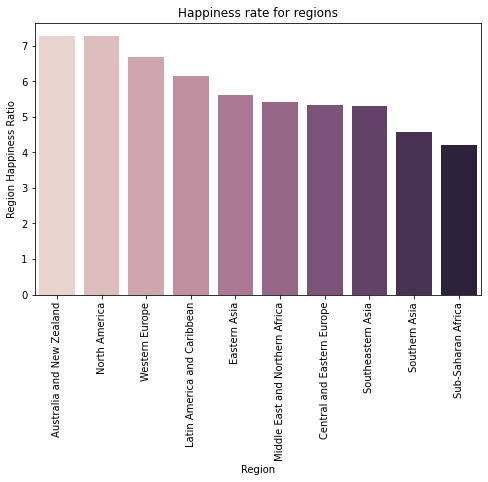

In [96]:
plt.figure(figsize=(8,5))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))
plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

### Map visualization development of happiness rank from 2015-2019 per country

In [97]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="north america",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [98]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="europe",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [99]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="asia",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [100]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="africa",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [101]:
fig = px.choropleth(df_all, locationmode = 'country names', locations="Country",
                    color="Happiness_Rank",
                    hover_name="Country",
                    animation_frame="year",
                    scope="south america",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

# Top 10 changes in happiness rank from 2015 to 2019, are there any reasons for this?

Which country made the biggest gain or loss in Happiness Rank from 2015 to 2019.

In [102]:
df2015_ranks = df2015[['Country','Happiness_Rank']]
df2015_ranks.rename(columns = {'Happiness_Rank':'2015'}, inplace = True)

df_ranks_change = df2019[['Country','Happiness_Rank']]
df_ranks_change.rename(columns = {'Happiness_Rank':'2019'}, inplace = True)

df_ranks_change = df_ranks_change.merge(df2015_ranks, on='Country')
df_ranks_change['change']=df_ranks_change['2015']-df_ranks_change['2019']
df_ranks_change

C:\Users\r-sut\anaconda3\envs\TSM_InfVis\lib\site-packages\pandas\core\frame.py:4304: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,2019,2015,change
0,Finland,1,6,5
1,Denmark,2,3,1
2,Norway,3,4,1
3,Iceland,4,2,-2
4,Netherlands,5,7,2
...,...,...,...,...
144,Yemen,151,136,-15
145,Rwanda,152,154,2
146,Tanzania,153,146,-7
147,Afghanistan,154,153,-1


In [103]:
change_top10 = df_ranks_change.sort_values('change', ascending = False).head(10)
change_bottom10 = df_ranks_change.sort_values('change', ascending = True).head(10)

## Best performers: who jumped the most?

In [104]:
change_top10

,Country,2019,2015,change
98,Benin,102,155,53
95,Ivory Coast,99,151,52
57,Honduras,59,105,46
60,Hungary,62,104,42
100,Gabon,104,143,39
46,Romania,48,86,38
109,Burkina Faso,115,152,37
92,Cameroon,96,133,37
93,Bulgaria,97,134,37
99,Congo (Brazzaville),103,139,36


### Let's look at change in detail from 2015-2019 for Benin, and Honduras
#### Benin:

In [105]:
benin = df_all[df_all.Country == 'Benin']
benin

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,year
154,Benin,Sub-Saharan Africa,155,3.340,0.286650,0.35386,0.31910,0.484500,0.080100,0.182600,2015
152,Benin,Sub-Saharan Africa,153,3.484,0.394990,0.10419,0.21028,0.397470,0.066810,0.201800,2016
137,Benin,Sub-Saharan Africa,143,3.657,0.431085,0.43530,0.20993,0.425963,0.060929,0.207948,2017
130,Benin,Sub-Saharan Africa,136,4.141,0.378000,0.37200,0.24000,0.440000,0.067000,0.163000,2018
98,Benin,Sub-Saharan Africa,102,4.883,0.393000,0.43700,0.39700,0.349000,0.082000,0.175000,2019


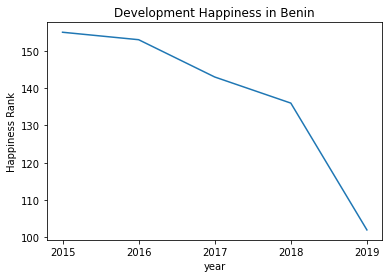

In [106]:
plt.plot(benin.year, benin.Happiness_Rank);
plt.title('Development Happiness Rank in Benin')
plt.xlabel('year')
plt.ylabel('Happiness Rank')
plt.show();

note: it looks like it is performing worse from 2015, but it is actually climbing the ranks. Maybe choose a different line graph/visualization?

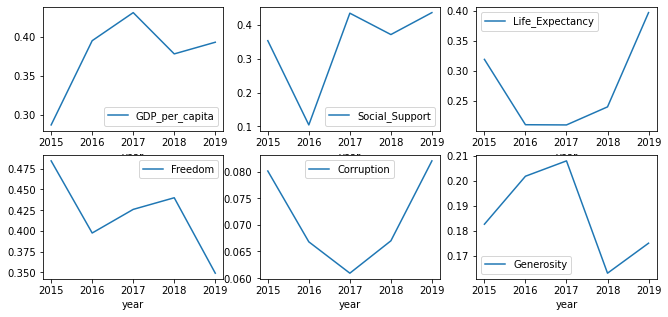

In [107]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,5));

benin.plot(ax=axes[0,0], x = 'year', y = 'GDP_per_capita');
benin.plot(ax=axes[0,1], x = 'year', y = 'Social_Support');
benin.plot(ax=axes[0,2], x = 'year', y = 'Life_Expectancy');
benin.plot(ax=axes[1,0], x = 'year', y = 'Freedom');
benin.plot(ax=axes[1,1], x = 'year', y = 'Corruption');
benin.plot(ax=axes[1,2], x = 'year', y = 'Generosity');

## Worst performers: who slipped the most?

In [108]:
change_bottom10

,Country,2019,2015,change
104,Venezuela,108,23,-85
131,Zambia,138,85,-53
137,Lesotho,144,97,-47
128,Swaziland,135,101,-34
139,Zimbabwe,146,115,-31
116,Mozambique,123,94,-29
140,Haiti,147,119,-28
134,Liberia,141,116,-25
133,India,140,117,-23
126,Ukraine,133,111,-22


There are quite heavy changes regarding happiness rank, performing the wors being Venezuela, with the country being in a long crisis.

### Let's look at change in detail from 2015-2019 for Venezuela, and Ukraine
#### Venezuela: country crisis

In [109]:
venezuela = df_all[df_all.Country == 'Venezuela']
venezuela

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,year
22,Venezuela,Latin America and Caribbean,23,6.810,1.044240,1.255960,0.720520,0.429080,0.110690,0.05841,2015
43,Venezuela,Latin America and Caribbean,44,6.084,1.133670,1.033020,0.619040,0.198470,0.083040,0.04250,2016
78,Venezuela,Latin America and Caribbean,82,5.250,1.128431,1.431338,0.617144,0.153997,0.064491,0.06502,2017
97,Venezuela,Latin America and Caribbean,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.05600,2018
104,Venezuela,Latin America and Caribbean,108,4.707,0.960000,1.427000,0.805000,0.154000,0.047000,0.06400,2019


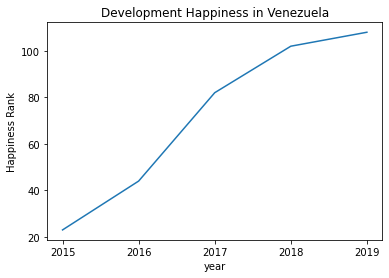

In [110]:
plt.plot(venezuela.year, venezuela.Happiness_Rank);
plt.title('Development Happiness in Venezuela')
plt.xlabel('year')
plt.ylabel('Happiness Rank')
plt.show();

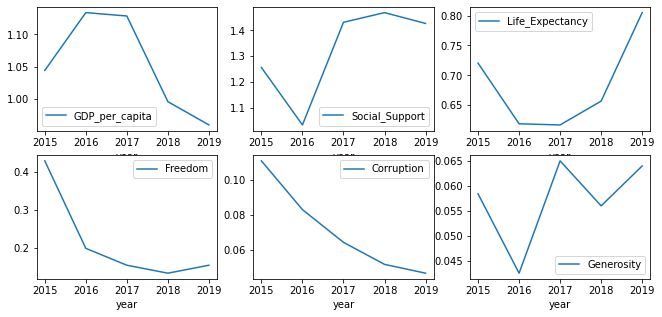

In [111]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,5));

venezuela.plot(ax=axes[0,0], x = 'year', y = 'GDP_per_capita');
venezuela.plot(ax=axes[0,1], x = 'year', y = 'Social_Support');
venezuela.plot(ax=axes[0,2], x = 'year', y = 'Life_Expectancy');
venezuela.plot(ax=axes[1,0], x = 'year', y = 'Freedom');
venezuela.plot(ax=axes[1,1], x = 'year', y = 'Corruption');
venezuela.plot(ax=axes[1,2], x = 'year', y = 'Generosity');

#### Ukraine: war

In [112]:
ukraine = df_all[df_all.Country == 'Ukraine']
ukraine

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,year
110,Ukraine,Central and Eastern Europe,111,4.681,0.799070,1.202780,0.673900,0.251230,0.029610,0.152750,2015
122,Ukraine,Central and Eastern Europe,123,4.324,0.872870,1.014130,0.586280,0.128590,0.018290,0.203630,2016
126,Ukraine,Central and Eastern Europe,132,4.096,0.894652,1.394538,0.575904,0.122975,0.023029,0.270061,2017
132,Ukraine,Central and Eastern Europe,138,4.103,0.793000,1.413000,0.609000,0.163000,0.011000,0.187000,2018
126,Ukraine,Central and Eastern Europe,133,4.332,0.820000,1.390000,0.739000,0.178000,0.010000,0.187000,2019


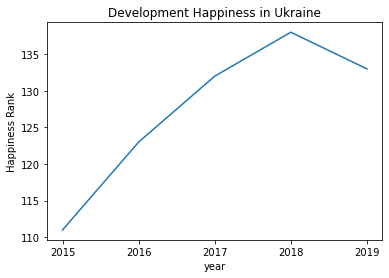

In [113]:
plt.plot(ukraine.year, ukraine.Happiness_Rank);
plt.title('Development Happiness in Ukraine')
plt.xlabel('year')
plt.ylabel('Happiness Rank')
plt.show();

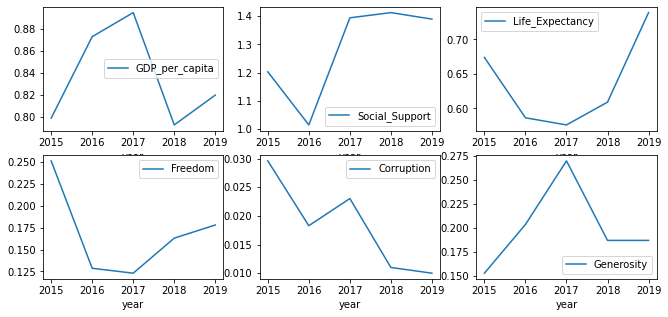

In [114]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(11,5));

ukraine.plot(ax=axes[0,0], x = 'year', y = 'GDP_per_capita');
ukraine.plot(ax=axes[0,1], x = 'year', y = 'Social_Support');
ukraine.plot(ax=axes[0,2], x = 'year', y = 'Life_Expectancy');
ukraine.plot(ax=axes[1,0], x = 'year', y = 'Freedom');
ukraine.plot(ax=axes[1,1], x = 'year', y = 'Corruption');
ukraine.plot(ax=axes[1,2], x = 'year', y = 'Generosity');

# Development of Switzerland from 2015-2019

In [115]:
switzerland = df_all[df_all.Country == 'Switzerland']
switzerland = switzerland.drop(columns=['Country', 'Region'])
switzerland

,Happiness_Rank,Happiness_Score,GDP_per_capita,Social_Support,Life_Expectancy,Freedom,Corruption,Generosity,year
0,1,7.587,1.39651,1.349510,0.941430,0.665570,0.419780,0.296780,2015
1,2,7.509,1.52733,1.145240,0.863030,0.585570,0.412030,0.280830,2016
3,4,7.494,1.56498,1.516912,0.858131,0.620071,0.367007,0.290549,2017
4,5,7.487,1.42000,1.549000,0.927000,0.660000,0.357000,0.256000,2018
5,6,7.480,1.45200,1.526000,1.052000,0.572000,0.343000,0.263000,2019


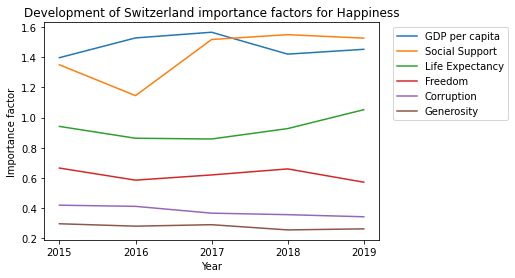

In [116]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11,5));
plt.figure()
plt.plot(switzerland.year, switzerland.GDP_per_capita, label='GDP per capita')
plt.plot(switzerland.year, switzerland.Social_Support, label='Social Support')
plt.plot(switzerland.year, switzerland.Life_Expectancy, label='Life Expectancy')
plt.plot(switzerland.year, switzerland.Freedom, label='Freedom')
plt.plot(switzerland.year, switzerland.Corruption, label='Corruption')
plt.plot(switzerland.year, switzerland.Generosity, label='Generosity')
plt.xlabel('Year')
plt.ylabel('Importance factor')
plt.legend(bbox_to_anchor=(1.4,1), loc='upper right')
plt.title('Development of Switzerland importance factors for Happiness')
plt.show()



### Analysis of development in Switzerland from 2015-2019

The visualizations of the different factors for the happiness calculations in Switzerland between 2015 and 2019 show an estimate on the importance of these different factors for each year.  

General Analysis:

The two most important factors are 'GDP per capita' and 'Social Support' which makes sense for a well functioning country with a lot of socialitarian structures. 
Corruption and Generosity are a pretty low importance factor, since most of the population doesn't feel to either be suppressed by the government or has to rely on others to survive. 

Life Expectancy and Freedom are in between of these 4 factors and are somewhat important but are overall not threatening for most people and therefore not as important as Social Support or money itself.


Yearly Development:
The most unstable factor is Social Support which proves to be an important factor and rose over the years but also experienced a downfall from 2015 to 2016 (Google why)

The stable income for Swiss is important and has been overall stable. Money will probably always be of importance for Switzerland and its Population.

Life Expectancy is rising overall. (Why is health getting more important?)

Freedom, Generosity and Corruption are almost stable and only fall off slowly. The analysis for this is that these factors didn't prove to have any negative influences over the years and therefore fall off slowly.